[57.24910158 44.94622923 29.77237357 ... 11.60310292 13.3009888
 10.71495168]
[57.24910158 40.75059024 31.20405827 ... 27.80663892 27.52085625
 25.45827938]


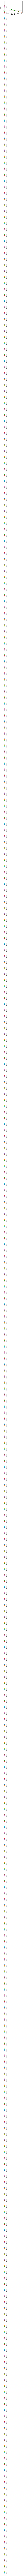

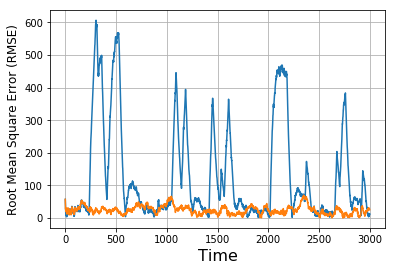

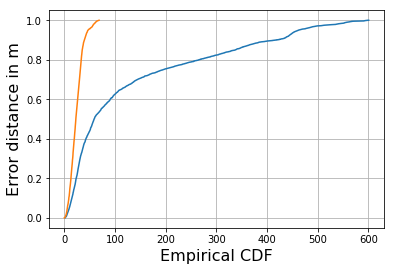

In [2]:
import scipy.io as sio
import robustsp as rsp
import matplotlib.pyplot as plt
import numpy as np
from robustsp.RobustFiltering.examples.Auxiliary.create_environment_book import create_environment_book
from robustsp.RobustFiltering.examples.Auxiliary.set_parameters_book import *


ekf_th = sio.loadmat('ekf_th')['ekf_th']
ekf_Hc = sio.loadmat('ekf_Hc')['ekf_Hc']

loadmat = lambda x: sio.loadmat(x)[x]

def matStruct2Dict(x):
    struct  = loadmat(x)
    dic     = {}
    for i in struct.dtype.names:
        dic[i] = struct[i][0][0]
    return dic

parameter = matStruct2Dict('parameter')

# Least-squares estimation
ekf_th_x = ekf_th[0][0][:]
ekf_th_y = ekf_th[0][1][:]
# Robust M-estimation
ekf_Hc_x = ekf_Hc[0][0][:]
ekf_Hc_y = ekf_Hc[0][1][:] 
    
fig1 = plt.figure(0)
plt.plot(parameter['BS'][:,0], parameter['BS'][:,1], 'o', linewidth=2, label='BS')
plt.plot(parameter['thx'],parameter['thy'], linewidth=5,label='True')
plt.plot(ekf_th_x, ekf_th_y, linewidth=2, label='EKF')
plt.plot(ekf_Hc_x, ekf_Hc_y, linewidth=1, label='Robust EKF',color='b')
plt.legend() 

# Evaluation of MSE
fig2 = plt.figure(1)
fig3 = plt.figure(2)
indices = np.sum(parameter['noiseindices'],axis=1)

eval_ekf= rsp.eval_track(ekf_th, parameter, 'r', fig1, fig2, fig3)
eval_ekf_Hc = rsp.eval_track(ekf_Hc, parameter, 'g', fig1, fig2, fig3)
#plt.show()